In [68]:
import pandas as pd
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random 
import numpy as np
print("Let's Begin")

df_fifa = pd.read_csv("../Data/Twitter.csv")

df_fifa = df_fifa[(df_fifa['sentiment'] == "Positive" )|( df_fifa['sentiment']  == "Negative")]
print(df_fifa)

Let's Begin
         id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                   tweet  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  


In [69]:
len(df_fifa['entity'].unique())

32

In [70]:
#Drop NA's
print(df_fifa.isna().sum())
df_fifa = df_fifa.dropna()
df_fifa.isna().sum()

id             0
entity         0
sentiment      0
tweet        361
dtype: int64


id           0
entity       0
sentiment    0
tweet        0
dtype: int64

In [71]:
# Checking if there are still some tweets which have empty string as value
df_fifa[(df_fifa['sentiment']=='Positive') & (df_fifa['tweet']=='')]

,id,entity,sentiment,tweet


In [72]:
df_fifa[(df_fifa['sentiment']=='Negative') & (df_fifa['tweet']=='')]

,id,entity,sentiment,tweet


<Axes: xlabel='sentiment'>

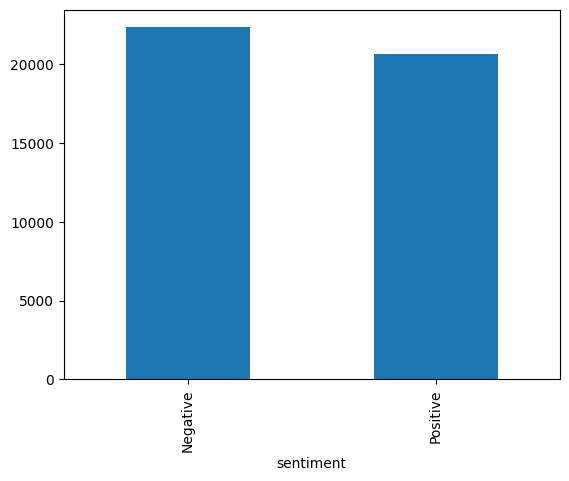

In [73]:
df_fifa['sentiment'].value_counts().plot(kind='bar')

In [74]:
test = df_fifa[(df_fifa['entity'] == "Borderlands")&(df_fifa['sentiment'] == "Negative")]
len(test['sentiment'])

426

In [75]:
df_fifa["sentiment"].describe()
#df_fifa[df_fifa["sentiment"] == "positive"].length
df_fifa.groupby('sentiment')['sentiment'].count()

sentiment
Negative    22358
Positive    20655
Name: sentiment, dtype: int64

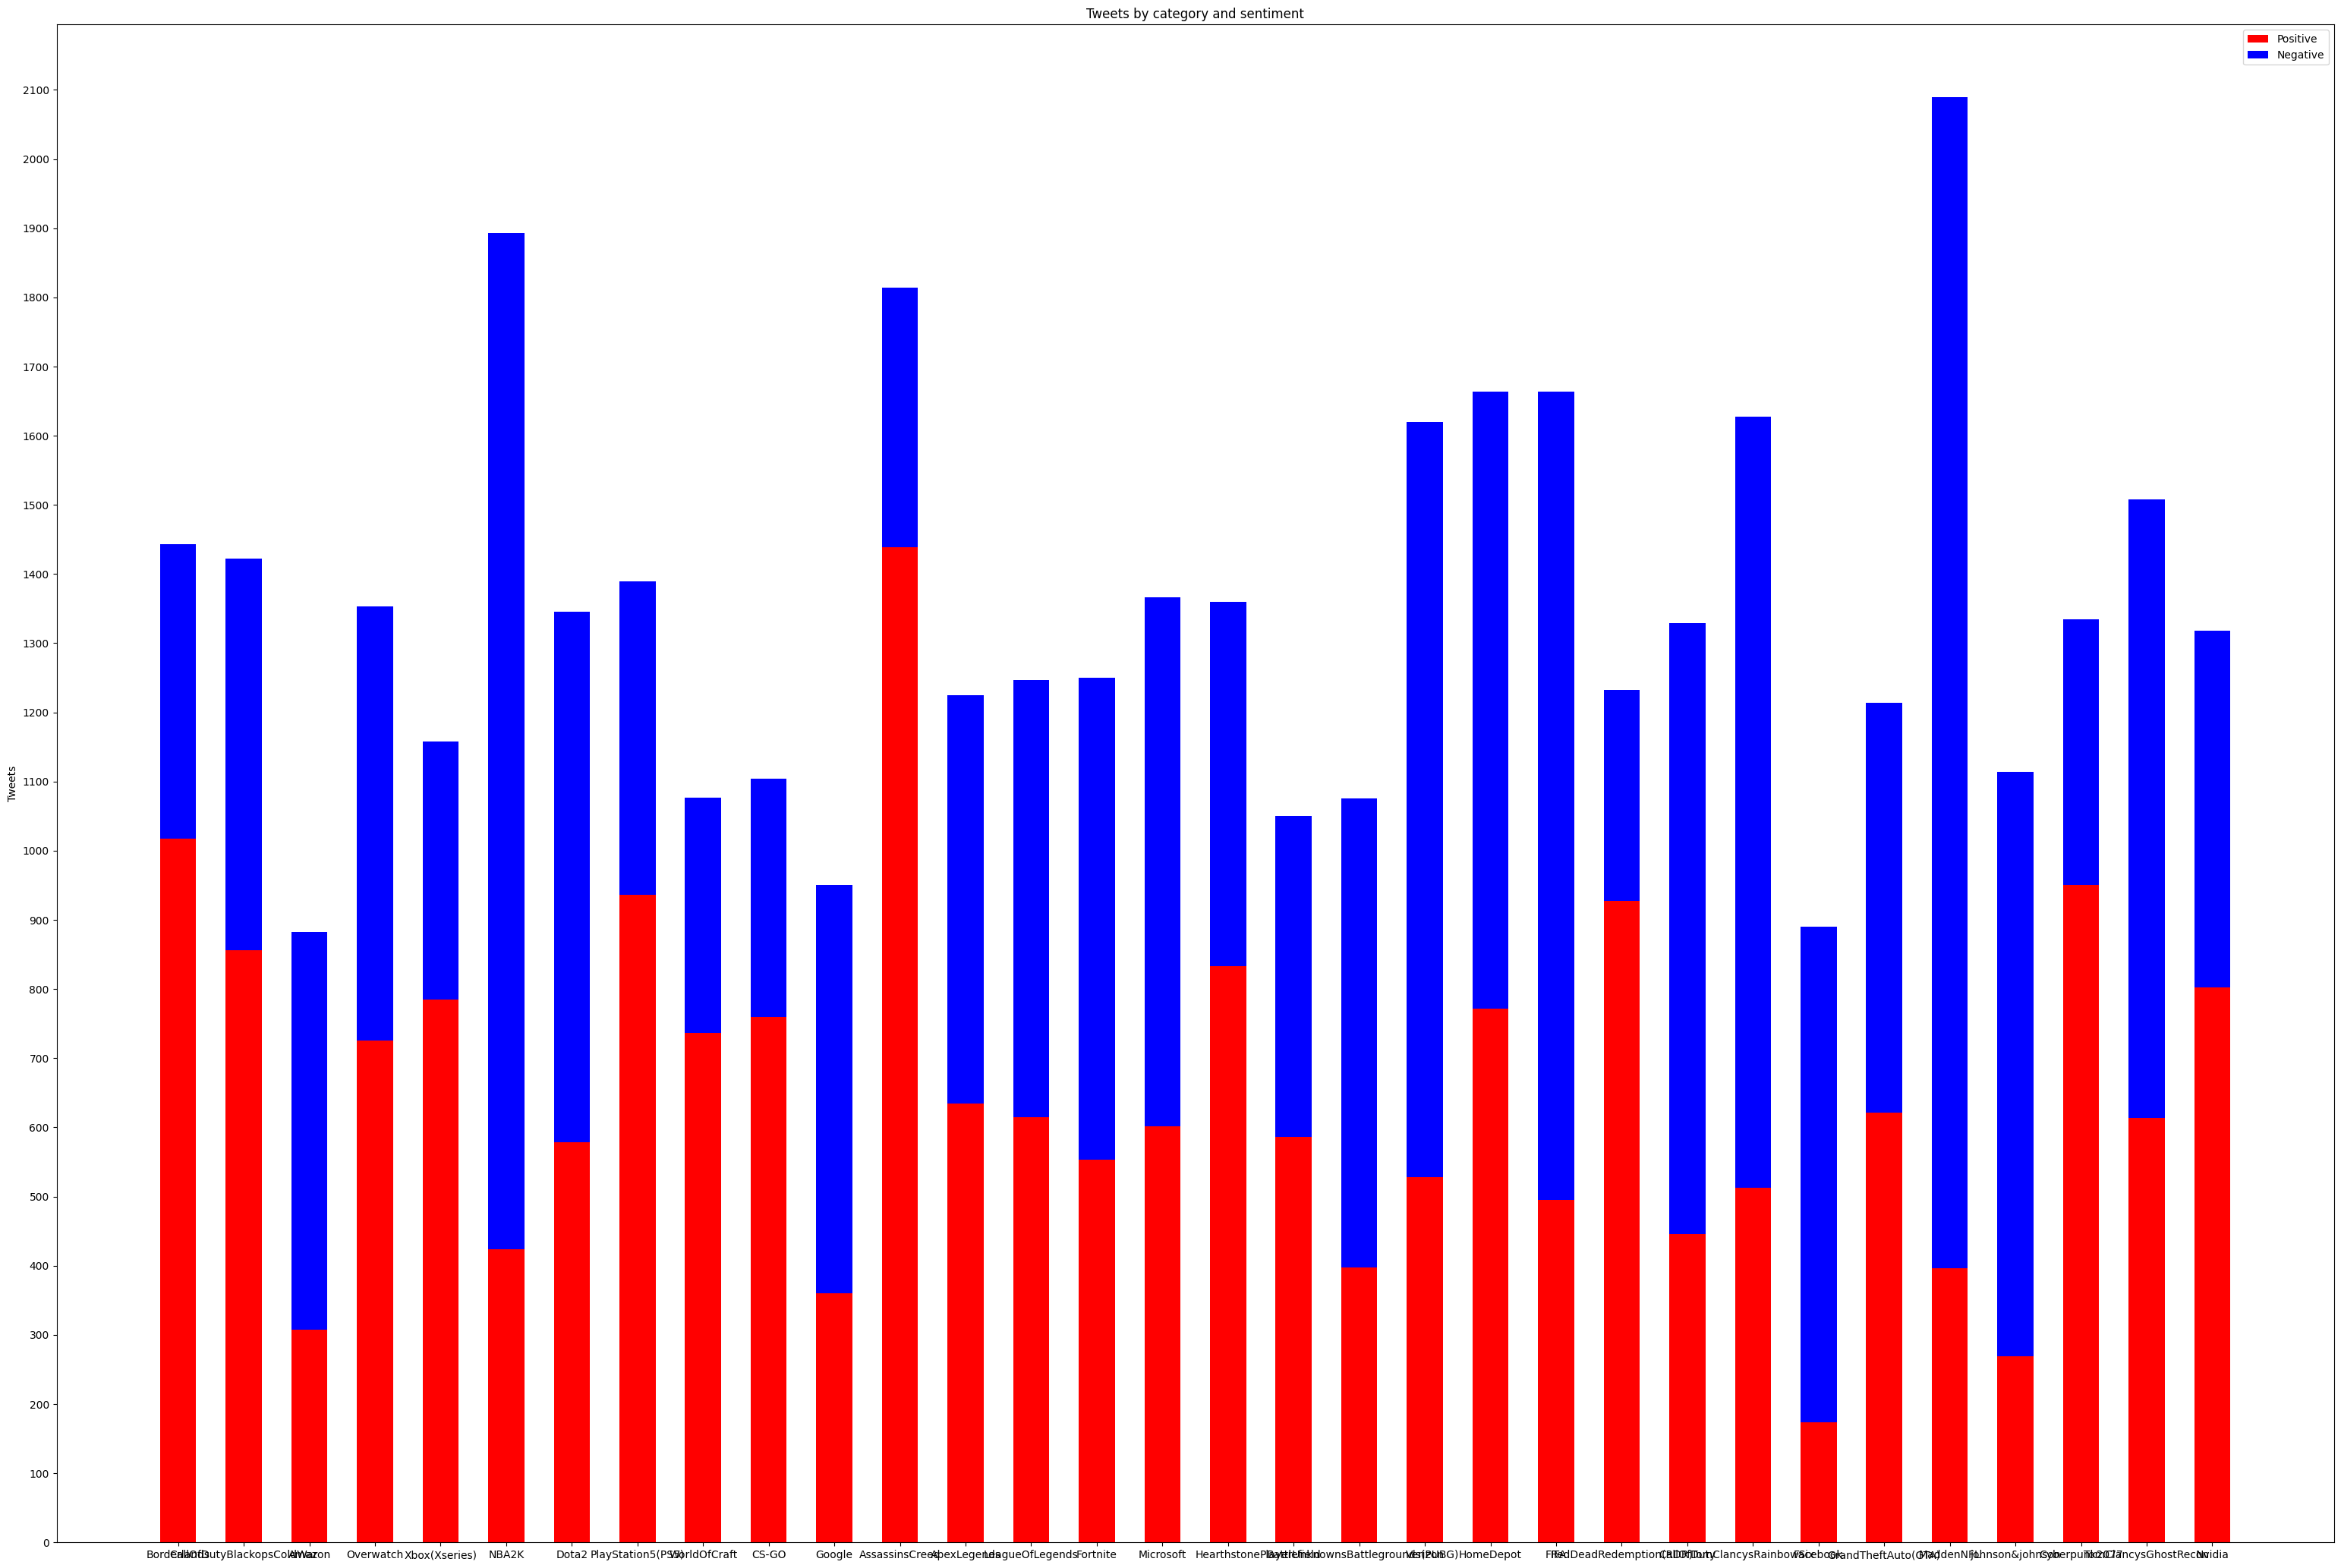

In [76]:
entities_list = list(df_fifa['entity'].unique())
N = len(entities_list)
positive_count =  tuple([len(df_fifa[(df_fifa['entity'] == entity)&(df_fifa['sentiment'] == "Positive")]) for entity in entities_list]) 
negative_count = tuple([len(df_fifa[(df_fifa['entity'] == entity)&(df_fifa['sentiment'] == "Negative")]) for entity in entities_list])
ind = np.arange(N) # the x locations for the groups
width = 0.55
fig = plt.figure(figsize=(30,20))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, positive_count, width, color='r')
ax.bar(ind, negative_count, width,bottom=positive_count, color='b')
ax.set_ylabel('Tweets')
ax.set_title('Tweets by category and sentiment')
ax.set_xticks(ind, tuple(entities_list))
ax.set_yticks(np.arange(0, 2200, 100))
ax.legend(labels=['Positive', 'Negative'])
plt.show()

In [77]:
# Plot most common words across all tweets
words_in_tweets = []
for key, value in df_fifa['tweet'].items():
    words_in_tweets.append(list(map(lambda token: token.lower(), value.split())))
print(len(words_in_tweets))

43013


In [78]:
import itertools
import collections

all_words = list(itertools.chain(*words_in_tweets))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(15)

[('the', 25671),
 ('i', 19069),
 ('to', 16654),
 ('and', 15375),
 ('a', 13328),
 ('is', 11075),
 ('of', 10795),
 ('this', 8549),
 ('for', 8520),
 ('in', 8377),
 ('my', 7407),
 ('it', 7275),
 ('@', 7021),
 ('you', 6578),
 ('on', 6318)]

In [79]:
word_count_df = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

word_count_df.head()

,words,count
0,the,25671
1,i,19069
2,to,16654
3,and,15375
4,a,13328


In [80]:
import matplotlib.pyplot as plt

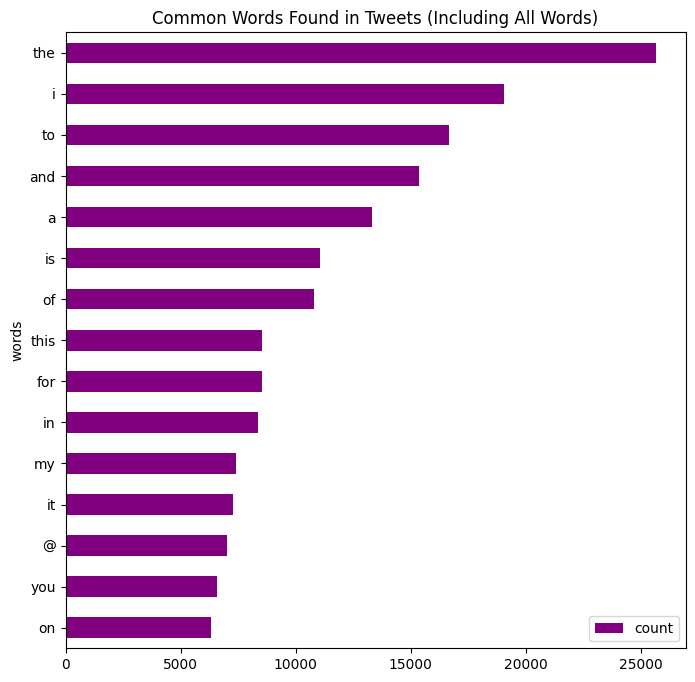

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

### Preprocess the raw text
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

 Tokenizing the string 
 Lowercasing
 Removing stop words and punctuation
 Stemming

In [82]:
# download the stopwords from NLTK - Need to run only once
nltk.download('stopwords')

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nagur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
stop_words = set(stopwords.words('english'))

In [84]:
def tokenize(tweet):
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens

In [85]:
def remove_stopwords(tweet_tokens):
    #Import the english stop words list from NLTK
    stopwords_english = stopwords.words('english') 
    
    #Creating a list of words without stopwords
    tweets_clean = []
    for word in tweet_tokens:
        if word not in stopwords_english and word not in string.punctuation:
            tweets_clean.append(word)
    return tweets_clean

In [86]:
def stem_tweet(tweet_tokens_without_stopwords):
    #Instantiate stemming class
    stemmer = PorterStemmer()

    #Creating a list of stems of words in tweet
    tweets_stem = []
    for token in tweet_tokens_without_stopwords:
        stem_word = stemmer.stem(token)
        tweets_stem.append(stem_word)
        
    return tweets_stem

In [87]:
def filter_tokens(tweet_token):
    undesired_chars = ['...', '..', '’']
    if tweet_token in undesired_chars:
        return False
    else:
        return True

In [88]:
def Preprocess(tweet):  
    
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
        
    # remove usernames
    tweet = re.sub(r'@[^ ]+', '', tweet)
    
    # remove html or any other tags
    tags_pattern = re.compile('<.*?>') 
    tweet = re.sub(tags_pattern, '', tweet)
    
    # tokenize tweets
    tweet_tokens = tokenize(tweet)
    
    # filter undesired characters from tokens
    tweet_tokens_without_undesired_chars = filter(filter_tokens, tweet_tokens)
    
    # removal of stopwords
    tweet_tokens_without_stopwords = remove_stopwords(tweet_tokens_without_undesired_chars)
    
    # stemming
    stemmed_tokens = stem_tweet(tweet_tokens_without_stopwords)
    
    return stemmed_tokens

In [89]:
print("sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i \U0001f602 @dheerajnaguru <sample>")
print(Preprocess("sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i \U0001f602 @dheerajnaguru <sample>"))

sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i 😂 @dheerajnaguru <sample>
['sunflow', 'favourit', 'happi', 'friday', '…']


In [90]:
df_fifa['tweet'] = df_fifa['tweet'].apply(Preprocess)

In [91]:
df_fifa.head()

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,"[im, get, borderland, murder]"
1,2401,Borderlands,Positive,"[come, border, kill]"
2,2401,Borderlands,Positive,"[im, get, borderland, kill]"
3,2401,Borderlands,Positive,"[im, come, borderland, murder]"
4,2401,Borderlands,Positive,"[im, get, borderland, 2, murder]"


In [94]:
tweet_tokens_list = []

for key, value in df_fifa['tweet'].items():
    tweet_tokens_list.append(value)

In [95]:
all_words = list(itertools.chain(*tweet_tokens_list))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(15)

[('game', 7881),
 ('play', 4640),
 ('get', 3679),
 ('fuck', 3202),
 ('like', 3158),
 ('go', 2443),
 ('love', 2441),
 ('2', 2433),
 ('time', 2284),
 ('realli', 2274),
 ('good', 2238),
 ('one', 2131),
 ("i'm", 1992),
 ('new', 1987),
 ('shit', 1965)]

In [96]:
word_count_df = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

word_count_df.head()

,words,count
0,game,7881
1,play,4640
2,get,3679
3,fuck,3202
4,like,3158


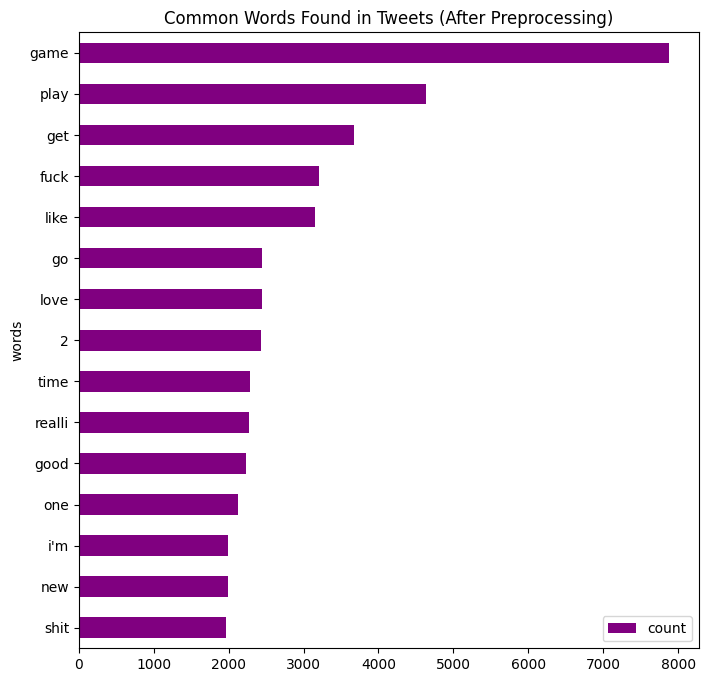

In [97]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (After Preprocessing)")

plt.show()

In [ ]:
df_fifa.to_csv('../Data/cleaned_tweets.csv')